In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.worldometers.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-23,845
2020-01-24,1317
2020-01-25,2015
2020-01-26,2800
2020-01-27,4581


In [4]:
data.tail()

,infected
date,
2020-03-13,145483
2020-03-14,156653
2020-03-15,169593
2020-03-16,182490
2020-03-17,198227


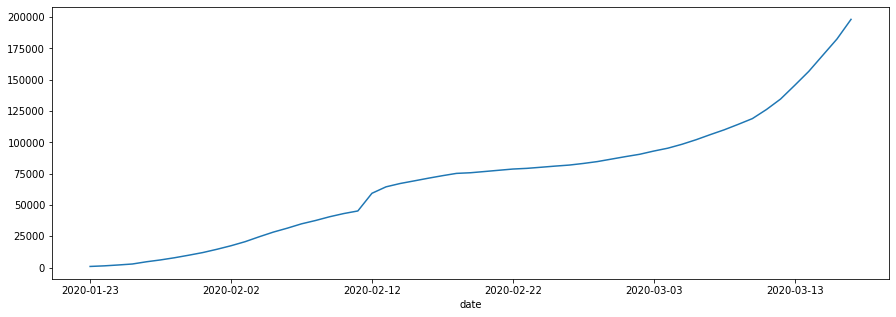

In [5]:
data.infected.plot(figsize=(15, 5))

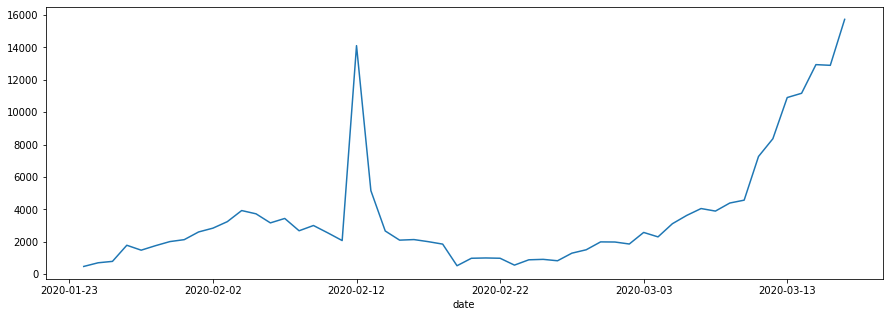

In [6]:
(data.infected - data.infected.shift(1)).plot(figsize=(15, 5))

In [7]:
from pyramid.arima import auto_arima

In [8]:
stepwise_model = auto_arima(data,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=969.889, BIC=981.711, Fit time=1.827 seconds
Fit ARIMA: order=(0, 2, 0); AIC=971.375, BIC=975.315, Fit time=0.014 seconds
Fit ARIMA: order=(1, 2, 0); AIC=967.171, BIC=973.082, Fit time=0.169 seconds
Fit ARIMA: order=(0, 2, 1); AIC=965.643, BIC=971.554, Fit time=0.382 seconds
Fit ARIMA: order=(1, 2, 1); AIC=967.643, BIC=975.524, Fit time=0.297 seconds
Fit ARIMA: order=(0, 2, 2); AIC=967.643, BIC=975.524, Fit time=0.458 seconds
Fit ARIMA: order=(1, 2, 2); AIC=969.628, BIC=979.480, Fit time=1.007 seconds
Total fit time: 4.190 seconds


In [9]:
stepwise_model.aic()

965.6432193355852

In [10]:
stepwise_model.fit(data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [11]:
predicted_days = 15
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [12]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [13]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-03-18 - 213121
2020-03-19 - 228284
2020-03-20 - 243713
2020-03-21 - 259410
2020-03-22 - 275373
2020-03-23 - 291604
2020-03-24 - 308103
2020-03-25 - 324868
2020-03-26 - 341901
2020-03-27 - 359201
2020-03-28 - 376768
2020-03-29 - 394602
2020-03-30 - 412703
2020-03-31 - 431072
2020-04-01 - 449708
